In [2]:
import tensorflow as tf
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

print(tf.__version__)
print(np.__version__)

2.9.1
1.22.4


# Intro to neural network classification

In [3]:
from sklearn.datasets import make_circles

n_samples = 1000
X,y = make_circles(n_samples, noise=0.03, random_state=42)

# circles = pd.DataFrame({'x0': X[:,0], 'x1':X[:,1], 'label':y})
# X = tf.constant(X, dtype=tf.float32)
# y = tf.constant(y, dtype=tf.float32)

In [4]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

model_1.compile(
    # loss = 'mae',
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_1.fit(X,y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 597us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [5]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

model_2.compile(
    # loss = 'mae',
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_2.fit(X,y, epochs=100, verbose=0)
model_2.evaluate(X,y)

32/32 [==============================] - 0s 629us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934733390808105, 0.5]

In [6]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
])

model_3.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_3.fit(X,y, epochs=100, verbose=0)
model_3.evaluate(X,y)

32/32 [==============================] - 0s 629us/step - loss: 0.6944 - accuracy: 0.5100


[0.6944003105163574, 0.5099999904632568]

In [7]:
def plot_decision_boundary(model, X, y):
    '''
    Plots decision boundary on a created model
    '''

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max()+0.1

    xx,yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model.predict(x_in)
    y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx,yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, s=40)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



313/313 [==============================] - 0s 519us/step


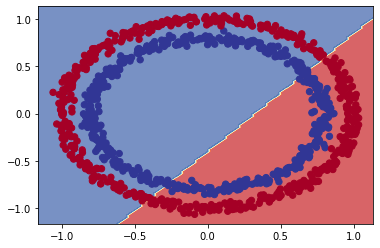

In [8]:
plot_decision_boundary(model_3,X,y)

In [9]:
# Test model in regression problem

tf.random.set_seed(42)
X_reg = tf.range(0,1000,5)
y_reg = tf.range(100,1100,5)    # y = X + 100

X_reg_train = X_reg[:150]
y_reg_train = y_reg[:150]

X_reg_test = X_reg[150:]
y_reg_test = y_reg[150:]

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

model_4.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)


2/2 [==============================] - 0s 2ms/step


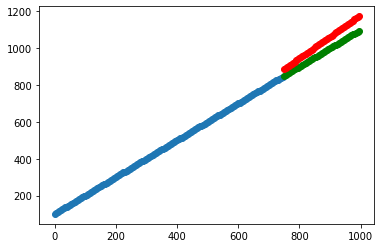

In [10]:
y_pred= model_4.predict(X_reg_test)
plt.scatter(X_reg_train, y_reg_train)
plt.scatter(X_reg_test, y_reg_test, c='green')
plt.scatter(X_reg_test, y_pred, c='red')

# Non linearity

In [11]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(40, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),

])

model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)


history = model_4.fit(X,y, epochs=20, verbose=0)

In [12]:
model_4.evaluate(X,y)

32/32 [==============================] - 0s 661us/step - loss: 0.0065 - accuracy: 1.0000


[0.006540562491863966, 1.0]

313/313 [==============================] - 0s 532us/step


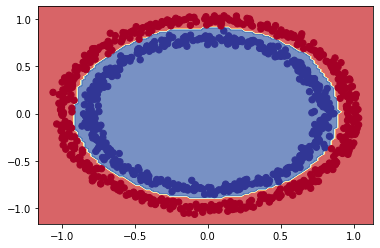

In [13]:
plot_decision_boundary(model_4, X, y)


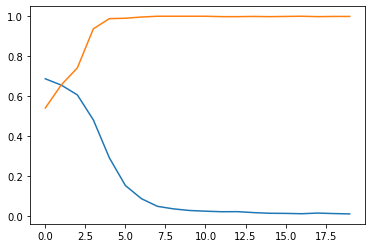

In [14]:
# plot the loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])